In [1]:
#This tutorial is a NFL penalty analysis
!pip install nflfastpy
import nflfastpy
import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

In [2]:
df = nflfastpy.load_pbp_data(year=2020)
#roster_df = nflfastpy.load_roster_data(year=2020)
team_logo_df = nflfastpy.load_team_logo_data()

In [3]:
#list(df.columns.values)

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

In [4]:
lst = [
'season_type',
'play_id',
'play_type',
'home_team',
'away_team',
'defteam',
 'home_wp',
 'away_wp',
 'epa',
 'wpa',
'penalty',
'penalty_type',
'penalty_team',
 'penalty_player_name',
 'penalty_yards',
   'desc'
]
#pen_df has all plays in the 2020 regular season where a penalty occurred
pen_df = df[lst].loc[df['penalty'] == 1].loc[df['season_type'] == 'REG']
pen_df['no_play'] = [1 if str(x).endswith('No Play.') else 0 for x in pen_df['desc'].tolist()]
#pen_noplay_df has all plays in the 2020 season where a penalty occurred and there was no play
pen_noplay_df = pen_df[lst+['no_play']].loc[pen_df['no_play'] == 1]
pen_noplay_df


,season_type,play_id,play_type,home_team,away_team,defteam,home_wp,away_wp,epa,wpa,penalty,penalty_type,penalty_team,penalty_player_name,penalty_yards,desc,no_play
46,REG,1205,no_play,SF,ARI,ARI,0.727823,0.272177,-0.697016,-0.024852,1.0,False Start,SF,G.Kittle,5.0,"(14:22) (Shotgun) PENALTY on SF-85-G.Kittle, F...",1
73,REG,1860,no_play,SF,ARI,SF,0.564762,0.435238,-0.431990,-0.017927,1.0,False Start,ARI,J.Pugh,5.0,"(3:01) (No Huddle, Shotgun) PENALTY on ARI-67-...",1
94,REG,2343,no_play,SF,ARI,SF,0.607988,0.392012,-0.875106,-0.041535,1.0,Offensive Holding,ARI,D.Daniels,10.0,(14:55) (Shotgun) 13-C.Kirk left end to ARI 40...,1
100,REG,2509,no_play,SF,ARI,SF,0.654649,0.345351,-0.450131,-0.018775,1.0,False Start,ARI,K.Drake,5.0,"(11:52) (Shotgun) PENALTY on ARI-41-K.Drake, F...",1
129,REG,3204,no_play,SF,ARI,SF,0.715583,0.284417,1.440474,0.061158,1.0,Defensive Holding,SF,K.Williams,5.0,"(1:37) (No Huddle, Shotgun) 1-K.Murray pass in...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46058,REG,1009,no_play,PHI,WAS,WAS,0.307287,0.692713,1.331884,0.024053,1.0,Defensive Holding,WAS,C.Holcomb,5.0,(12:02) (Shotgun) 2-J.Hurts sacked at WAS 27 f...,1
46093,REG,1826,no_play,PHI,WAS,PHI,0.553684,0.446316,0.646741,0.052025,1.0,Neutral Zone Infraction,PHI,J.Hargrave,5.0,"(:41) (Shotgun) PENALTY on PHI-93-J.Hargrave, ...",1
46125,REG,2515,no_play,PHI,WAS,WAS,0.447792,0.552208,-0.975845,-0.041583,1.0,Delay of Game,PHI,NaN,5.0,"(5:07) (Shotgun) PENALTY on PHI, Delay of Game...",1
46153,REG,3180,no_play,PHI,WAS,PHI,0.190075,0.809925,-1.085050,-0.024325,1.0,Offensive Holding,WAS,M.Moses,10.0,(9:34) 24-A.Gibson right end to PHI 23 for 2 y...,1


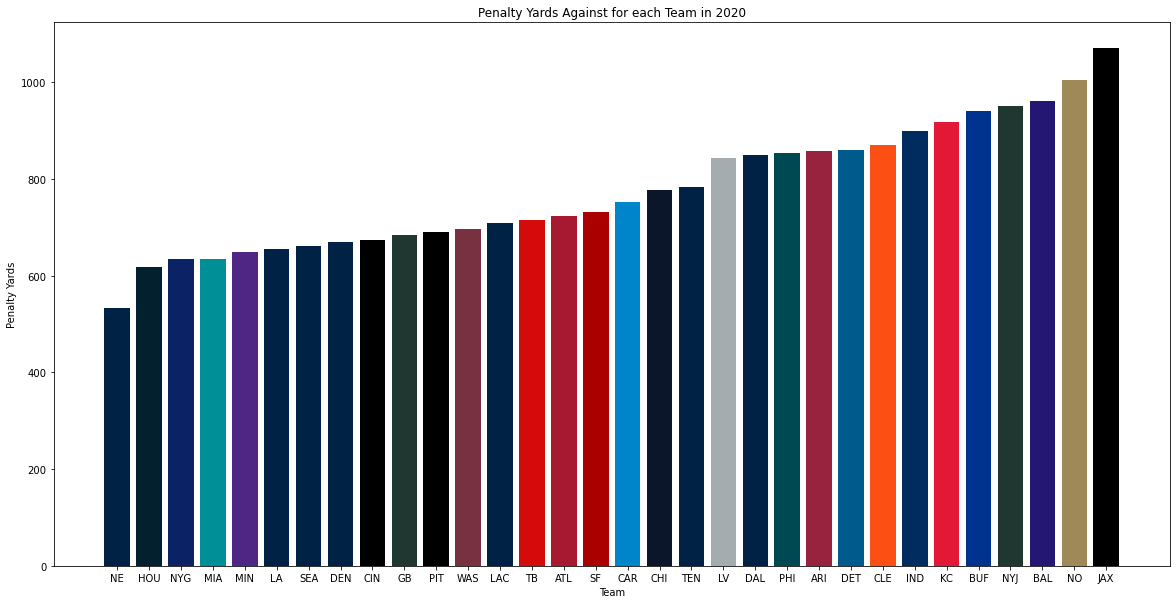

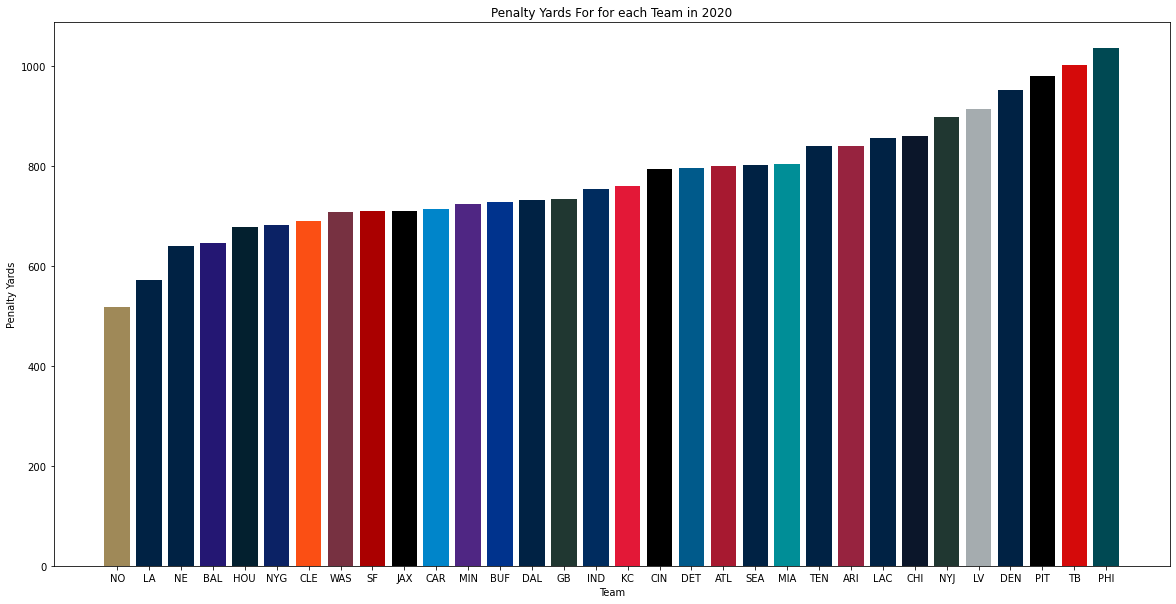

In [5]:
#team colors
team_colors_map = dict(zip(team_logo_df['team_abbr'].tolist(),team_logo_df['team_color'].tolist()))
#Find the total penalty yards for each team
pen_yards_ag = {}
pen_yards_for = {}
for index, row in pen_df.iterrows():
    if row['penalty_team'] in pen_yards_ag:
        pen_yards_ag[row['penalty_team']] +=  row['penalty_yards']
    else:
        pen_yards_ag[row['penalty_team']] =  row['penalty_yards']
        
    if row['penalty_team'] == row['home_team']:
        ben_team = row['away_team']
    else:
        ben_team = row['home_team']
        
    if ben_team in pen_yards_for:
        pen_yards_for[ben_team] +=  row['penalty_yards']
    else:
        pen_yards_for[ben_team] =  row['penalty_yards']
        
pen_yards_ag = dict(sorted(pen_yards_ag.items(), key=lambda x: x[1]))
x_pos = [i for i, _ in enumerate(pen_yards_ag.keys())]
colors = [team_colors_map[x] for x in pen_yards_ag.keys()]
plt.figure(figsize=(20,10))
plt.bar(x_pos, pen_yards_ag.values(), color=colors, tick_label=list(pen_yards_ag.keys()))
plt.xlabel("Team")
plt.ylabel("Penalty Yards")
plt.title("Penalty Yards Against for each Team in 2020")
plt.show()

pen_yards_for = dict(sorted(pen_yards_for.items(), key=lambda x: x[1]))
x_pos = [i for i, _ in enumerate(pen_yards_for.keys())]
colors = [team_colors_map[x] for x in pen_yards_for.keys()]
plt.figure(figsize=(20,10))
plt.bar(x_pos, pen_yards_for.values(), color=colors, tick_label=list(pen_yards_for.keys()))
plt.xlabel("Team")
plt.ylabel("Penalty Yards")
plt.title("Penalty Yards For for each Team in 2020")
plt.show()

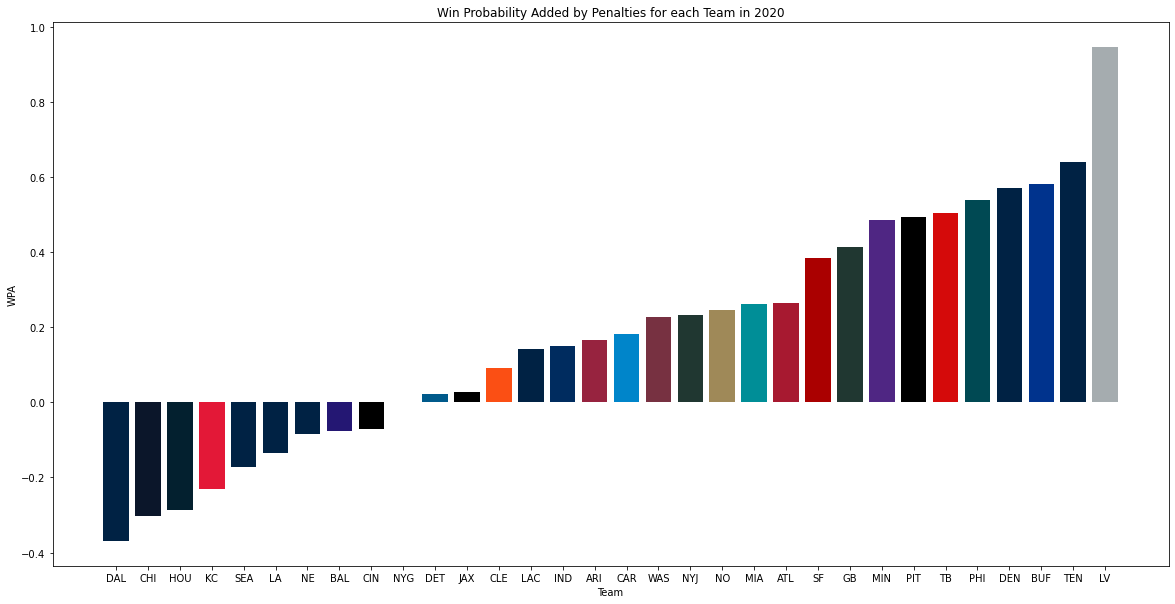

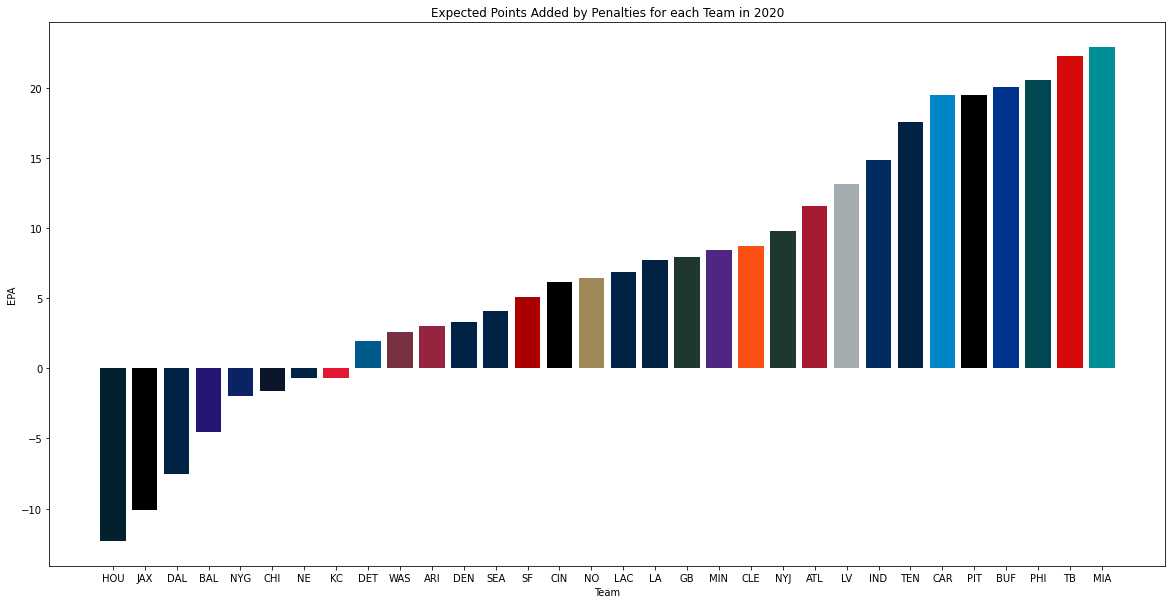

In [6]:
wpa_for = {}
epa_for = {}
for index, row in pen_noplay_df.iterrows():
    if row['penalty_team'] == row['home_team']:
        ben_team = row['away_team']
    else:
        ben_team = row['home_team']
    
    if str(row['wpa']) != 'nan':
        if ben_team in wpa_for:
            wpa_for[ben_team] +=  row['wpa']
        else:
            wpa_for[ben_team] =  row['wpa']
            
    if str(row['epa']) != 'nan':
        if ben_team in epa_for:
            epa_for[ben_team] +=  row['epa']
        else:
            epa_for[ben_team] =  row['epa']

wpa_for = dict(sorted(wpa_for.items(), key=lambda x: x[1]))
x_pos = [i for i, _ in enumerate(wpa_for.keys())]
colors = [team_colors_map[x] for x in wpa_for.keys()]
plt.figure(figsize=(20,10))
plt.bar(x_pos, wpa_for.values(), color=colors, tick_label=list(wpa_for.keys()))
plt.xlabel("Team")
plt.ylabel("WPA")
plt.title("Win Probability Added by Penalties for each Team in 2020")
plt.show()

epa_for = dict(sorted(epa_for.items(), key=lambda x: x[1]))
x_pos = [i for i, _ in enumerate(epa_for.keys())]
colors = [team_colors_map[x] for x in epa_for.keys()]
plt.figure(figsize=(20,10))
plt.bar(x_pos, epa_for.values(), color=colors, tick_label=list(epa_for.keys()))
plt.xlabel("Team")
plt.ylabel("EPA")
plt.title("Expected Points Added by Penalties for each Team in 2020")
plt.show()